# TDMb Movie Data

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> TDMb movie dataset contains various information about around 10,000 movies ranging back to 1960, these information include: budget, revenue, director, release year and date, number of votes, the average vote, and genres.

<a id='wrangling'></a>
## Data Wrangling
>Since the date of release of the movies range back to 1960, we will limit our analysis to the last 15 years.
## Research questions
There are multuple questions to be asked about this data set but, I will focus my data analysis on two depedenet variables: Popularity and Revenue. Which director made the most popular films? on which months do popualr films tend to be released? which genres are the most popular.? does the high/low budget have a hand in a movie succses? Can low budget movies outpreform high budget movies in terms of votes and revenue?

### General Properties

In [1178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    # Loading data
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
p = pd.read_csv('tmdb-movies.csv')
print(p.shape)
df = p.query('release_year >= 2000')  #inspecting data

(10866, 21)


Coloumns like id, imdb_id, homepage, cast,tagline, keywords and overview will be droped as they will not be used. I will use the adjusted for the 2010 dollar (because of inflation) revenue and budget to make all the movies on the same line in term of money

### Removing columns fuction

In [1179]:
def remove(df, columns):
    '''Takes a DataFrame and an array of columns to be droped
    returns the DataFrame with the droped columns '''
    x = df.drop(columns = columns , axis = 1)
    return x
    

### Removing columns

In [1180]:
df = remove(df, ['id', 'cast','imdb_id', 'homepage', 'tagline' , 'keywords' , 'overview', 'budget', 'revenue'])

### Checking for NAN or inputs with error and duplicates

In [1181]:
print(df.isnull().sum()) #null values found in the cast,director,genres and production companies columns

df.describe() #The data puts 0 in revenue and budget coloumns instead of a null value

print(df.shape)


popularity                0
original_title            0
director                 39
runtime                   0
genres                   18
production_companies    849
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64
(7168, 12)


# I will create two dataframes for the propuses of each reseach question.

> Popularity dataframe

In [1182]:
# removing unwanted columns
df_pop = remove(df, ['runtime', 'vote_count','vote_average', 'budget_adj', 'revenue_adj' ])
df_pop.head()

popularity                original_title          director  \
0   32.985763                Jurassic World   Colin Trevorrow   
1   28.419936            Mad Max: Fury Road     George Miller   
2   13.112507                     Insurgent  Robert Schwentke   
3   11.173104  Star Wars: The Force Awakens       J.J. Abrams   
4    9.335014                     Furious 7         James Wan   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  \
0  Universal Studios|Amblin Entertainment|Legenda...   06/09/2015   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4  Universal Pictures|Original Film|Media Rights ...   04/01/2015   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

> Revenue dataframe

In [1183]:
df_rev = remove(df, ['runtime','release_date','popularity','director'])
df_rev.head()

original_title                                     genres  \
0                Jurassic World  Action|Adventure|Science Fiction|Thriller   
1            Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   
2                     Insurgent         Adventure|Science Fiction|Thriller   
3  Star Wars: The Force Awakens   Action|Adventure|Science Fiction|Fantasy   
4                     Furious 7                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  
3           7.5          2015  183999919.0  1.902723e+09  
4           7.3          2015  174799923.1  1.385749e+09

<a id='eda'></a>
## Exploratory Data Analysis

In [1184]:
df_pop['popularity'].describe()

count    7168.000000
mean        0.693524
std         1.129084
min         0.000620
25%         0.204304
50%         0.390767
75%         0.767455
max        32.985763
Name: popularity, dtype: float64

### Factors affecting popularity
### 1) Directors

Christopher_Nolan  Peter_Jackson  George_Miller  James_Gunn  \
Popularity            7.695094       5.709959      10.254001    5.225378   
# of movies           8.000000       8.000000       3.000000    3.000000   

             Alan_Taylor  Wes_Ball  Colin_Trevorrow  Pete_Docter  \
Popularity      6.883129  5.553082        16.696886     6.326804   
# of movies     2.000000  2.000000         2.000000     1.000000   

             Don_Hall|Chris_Williams  Dan_Gilroy  Chad_Stahelski|David_Leitch  \
Popularity                  8.691294    5.522641                    11.422751   
# of movies                 1.000000    1.000000                     1.000000   

             Joe_Russo|Anthony_Russo  Kyle_Balda|Pierre_Coffin  Alex_Garland  \
Popularity                 12.971027                  7.404165      6.118847   
# of movies                 1.000000                  1.000000      1.000000   

             Juno_John_Lee  Patrick_Tatopoulos  
Popularity        8.411577            5.806897  
# of movies       1.000000            1.000000

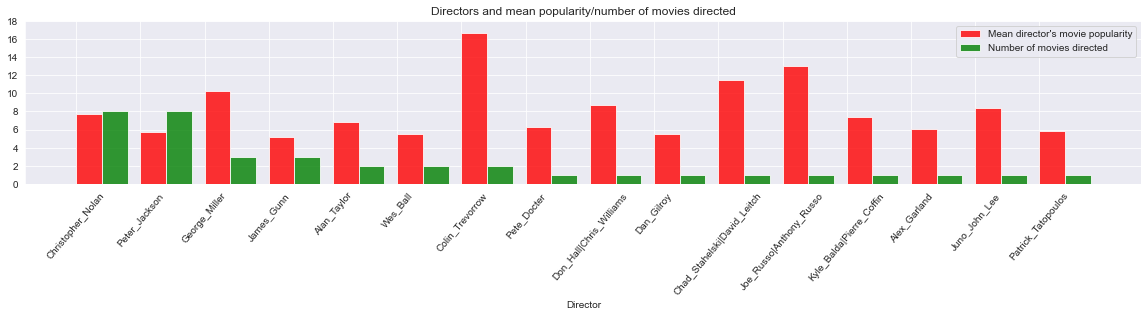

In [1186]:
df_pop['director'] = df_pop['director'].str.replace(' ', '_') #Fixing the data

df_dirr = df_pop.set_index('director') # creating a new df with the directors as index
df_dir = df_pop.groupby('director')['popularity'].mean()   #Calculating the mean of popularity of the movies grouped by the directors
dir_mean = df_dir.mean()  # calculating the mean and the standerd devation of the mean of popularity
dir_std = df_dir.std()

elite_dir = df_dir[df_dir > dir_mean+ 6*dir_std]  #selecting the directors with mean popularity 6 stds away from the mean (elite directors according to popularity)
no_movies = df_dirr.loc[elite_dir.index].index.value_counts() # calculating the number of movies done by each director
elite_dir = elite_dir.reindex(no_movies.index) # reindexing the elitedir series
#ploting
width = 0.4
ind = (np.arange(len(no_movies)))
elite_dir_bar = plt.bar(ind,elite_dir,width,alpha = 0.8 , color = 'r',label = 'Mean director\'s movie popularity')
no_movies_bar = plt.bar(ind+width,no_movies,width,alpha = 0.8, color = 'g',label = 'Number of movies directed ')
locations = ind - width / 2  # xtick locations
labels = np.array(elite_dir.index)# xtick labels
plt.xticks(locations, labels, rotation = 50)
plt.yticks(np.arange(0,20,2))
plt.xlabel('Director')
plt.title('Directors and mean popularity/number of movies directed')
plt.rcParams["figure.figsize"] = (20,3)
plt.legend();
pd.DataFrame([elite_dir,no_movies], index = ['Popularity', '# of movies' ])

### Finding
It is found that the directors that direct movies that eventually become very popular usually direct a small number of movies, Colin Trevorrow has the highest mean of popularity and has only directed 2 movies! so also is Wes ball and Alan Taylor. But this could have multiple reasons, one could be that as we are analyzing movies starting from 2000, maybe some of these very popular films are a remake from an old famous movie. This might be unfair to the directors who directed numerous films. So we will do the same analysis but with directors who directed the highest number of films and maintained good popularity.

director     Chris_Columbus  Christopher_Nolan  David_Fincher  \
Popularity         3.832484           7.695094        2.80585   
# of movies        6.000000           8.000000        6.00000   

director     Francis_Lawrence  Gore_Verbinski  James_Wan  Jon_Favreau  \
Popularity           4.437604        2.695388   2.229703     2.729296   
# of movies          6.000000        8.000000   8.000000     7.000000   

director     Peter_Jackson  Quentin_Tarantino  Ridley_Scott  Sam_Mendes  \
Popularity        5.709959            4.45684      2.434087    2.526412   
# of movies       8.000000            7.00000     13.000000    6.000000   

director     Steven_Spielberg  Tim_Burton  Zack_Snyder  
Popularity           2.217653    2.205754     2.199367  
# of movies         11.000000    9.000000     6.000000

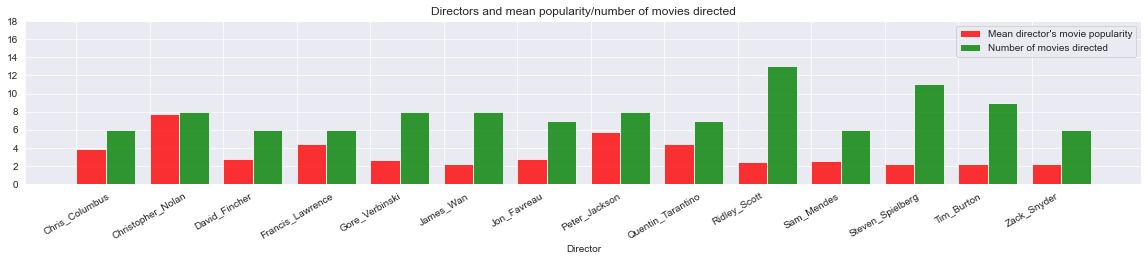

In [1187]:

dir_list = df_pop['director'].value_counts()[0:150].index  # list of top 150 directors in terms of number of movies 
num_movies = df_pop['director'].value_counts()[0:150]  # number of movies for each director

dir_df = df_dirr.loc[dir_list]  #df_dirr is a df from the prevous cell
df_director = dir_df.groupby('director')['popularity'].mean()     # same as the prevous analysis

df_dir_mean = df_director.mean()
df_dir_std = df_director.std()


eliite_dir = df_director[df_director > df_dir_mean + df_dir_std]  #filtring for 1 std away from the mean
num_movies = num_movies.reindex(eliite_dir.index) 

# plotting
width = 0.4
ind = (np.arange(len(num_movies)))
elite_dir_bar = plt.bar(ind,eliite_dir,width,alpha = 0.8 , color = 'r',label = 'Mean director\'s movie popularity')
no_movies_bar = plt.bar(ind+width,num_movies,width,alpha = 0.8, color = 'g',label = 'Number of movies directed ')
locationss = ind - width / 2  # xtick locations
labelss = np.array(eliite_dir.index)# xtick labels
plt.xticks(locationss, labelss, rotation = 30)
plt.yticks(np.arange(0,20,2))
plt.xlabel('Director')
plt.title('Directors and mean popularity/number of movies directed')

plt.rcParams["figure.figsize"] = (20,3)
plt.legend();
pd.DataFrame([eliite_dir,num_movies], index = ['Popularity', '# of movies' ])

Starting from the 00's, Christopher Nolan knew how to do blockbusters!

### 2) Months

popularity
month            
1        0.495704
2        0.633738
3        0.703517
4        0.605807
5        0.819671
6        0.840644
7        0.819687
8        0.641614
9        0.591901
10       0.658326
11       0.820654
12       0.875930

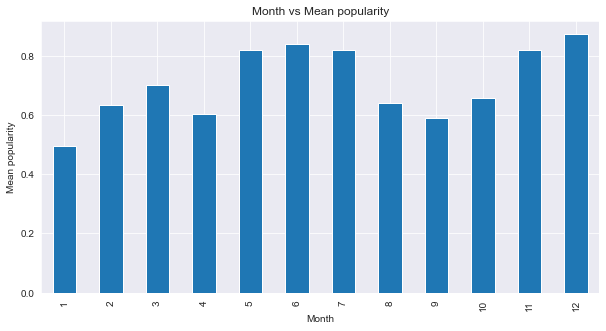

In [1188]:
plt.rcParams["figure.figsize"] = (10,5)
df_pop['release_date'] = pd.to_datetime(df_pop['release_date'])  #converting the release date coloumn data to date-time data
df_pop['month'] = df_pop['release_date'].dt.month                #creating a new column "month" to the df


df_pop.groupby(['month'])['popularity'].mean().plot(kind = 'bar', xlabel = 'Month',ylabel = 'Mean popularity',title = 'Month vs Mean popularity');  # The mean popularity over all years for each month 
pd.DataFrame(df_pop.groupby(['month'])['popularity'].mean())

### Finding
The bar diagram shows that the months in which the most popular movies are released are May and June (mid-year) and November and December (the end of the year). So its more probable that a popular movie will be released at these time

### 3) Genres

popularity
genres                                                       
Action|Adventure|Science Fiction|Thriller            9.421224
Action|Animation|Horror                              8.411577
Action|Thriller|Science Fiction|Mystery|Adventure    9.363643
Adventure|Comedy|Fantasy|Family                      6.286692
Adventure|Drama|Science Fiction                     24.949134
Adventure|Family|Animation|Action|Comedy             8.691294
Adventure|Science Fiction|Thriller                  13.112507
Drama|Adventure|Science Fiction                      7.667400
Fantasy|Action|Thriller                              6.887883
History|Drama|Thriller|War                           8.110711
Science Fiction|Action|Thriller|Adventure            8.654359
Science Fiction|Adventure|Thriller                  10.739009
Science Fiction|Fantasy|Action|Adventure             6.189369
War|Drama|Action                                     6.415818
Western|Drama|Adventure|Thriller                     9.110700

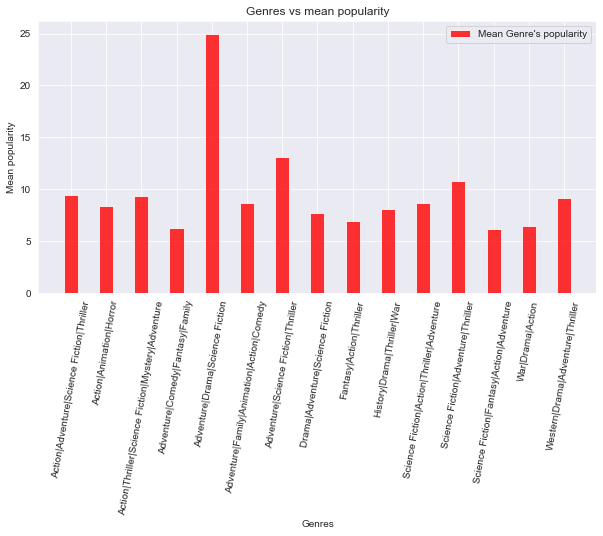

In [1189]:
plt.rcParams["figure.figsize"] = (10,5)
gen_pop = df.groupby(['genres'])['popularity'].mean()  #grouping by genres and selecting the popularity column

gen_mean = gen_pop.mean()
gen_std = gen_pop.std()                               # Calculating the mean and the std of the dataset and filtring for 4 stds away from the mean
height = gen_pop[gen_pop > gen_mean + 4*gen_std]

#plotting
width = 0.4
ind = (np.arange(len(height)))
elite_dir_bar = plt.bar(ind,height,width,alpha = 0.8 , color = 'r',label = 'Mean Genre\'s popularity')
locationss = ind  # xtick locations
labelss = np.array(height.index)# xtick labels
plt.xticks(locationss, labelss, rotation = 80)

plt.xlabel('Genres')
plt.ylabel('Mean popularity')
plt.title('Genres vs mean popularity')
plt.legend();

pd.DataFrame(height)


### Finding
Science fiction is found various times among the other genres and there is a large spike with the Adventure, Drama, Science fiction trio. Suggesting that science fiction movies have higher probability to be more popular 

## Part 2: Revenue


### 1) Comparison between low/high budget movies

In [1190]:
# droping the rows that has movies that made a loss and that have budget/ revenue less than 0
df_rev = df_rev.query('revenue_adj > 1 ').query('budget_adj > 1')
print(df_rev.shape)
df_rev = df_rev.query('revenue_adj - budget_adj > 0')
print(df_rev.shape)
# New column that has the net profit
df_rev['profit'] = (df_rev['revenue_adj'] - df_rev['budget_adj'])  
#Caluclating the profit markup (how many dollars earned from a dollar spent)
df_rev['profit_markup'] = df_rev['profit']/df_rev['budget_adj']
 # calculating the profit margin (what percentage is the net profit from the total revenue)
df_rev['profit_margin_percent'] = df_rev['profit']*100/df_rev['revenue_adj']  
df_suc = df_rev
df_suc.describe()

(2500, 8)
(1750, 8)


vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  1750.000000   1750.000000   1750.000000  1.750000e+03  1.750000e+03   
mean    841.580571      6.234971   2008.126286  5.233793e+07  1.733407e+08   
std    1096.784025      0.748263      4.450804  5.209843e+07  2.229986e+08   
min      10.000000      3.400000   2000.000000  3.000000e+00  1.029637e+01   
25%     182.250000      5.700000   2005.000000  1.543478e+07  4.273952e+07   
50%     444.000000      6.200000   2008.000000  3.392893e+07  9.714690e+07   
75%    1021.500000      6.700000   2012.000000  7.273568e+07  2.075595e+08   
max    9767.000000      8.200000   2015.000000  3.683713e+08  2.827124e+09   

             profit  profit_markup  profit_margin_percent  
count  1.750000e+03    1750.000000            1750.000000  
mean   1.210028e+08      27.204862              59.868108  
std    1.869113e+08     712.595122              23.906101  
min    9.360334e-01       0.000868               0.086718  
25%    1.814415e+07       0.828067              45.297376  
50%    5.695732e+07       1.776769              63.986916  
75%    1.362363e+08       3.598653              78.254500  
max    2.586237e+09   26880.720425              99.996280

## Box Plots for profit and profit markup

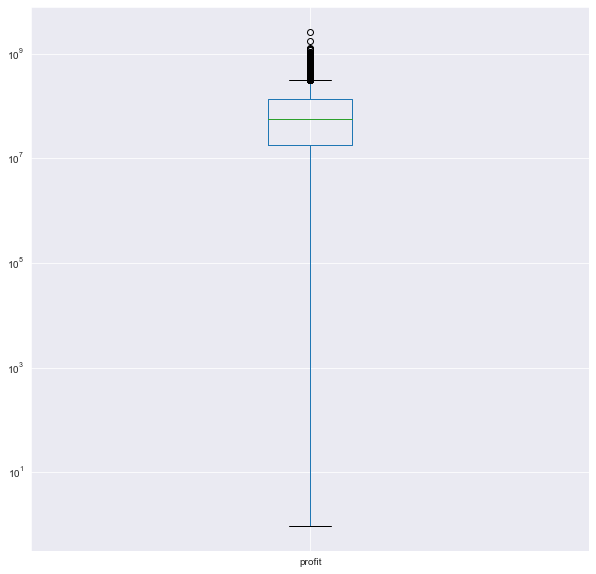

In [1191]:
df_suc.boxplot(column = ['profit'], figsize = (10,10)).set_yscale('log')

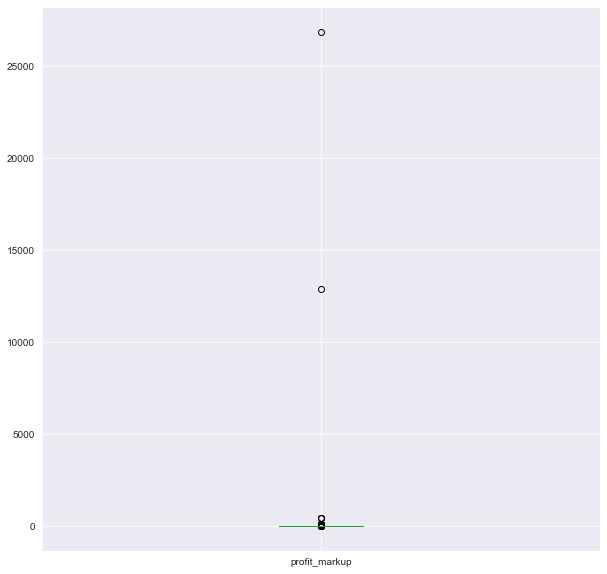

In [1192]:
df_suc.boxplot(column = ['profit_markup'],figsize = (10,10));

I removed rows that have 0 budget/revenue and that made a loss. I introduced two new columns Profit Markup and Profit Margin Range. Profit Markup is how many dollars are earned for a dollar spent and Profit Margin is the percentage of net profit from the total profit. And By checking the box plots of the profits and profit markup, we can find that there are extreme outliers, and since the standard deviation for both variables is very high, I will use the interquartile range method for detecting outliers.

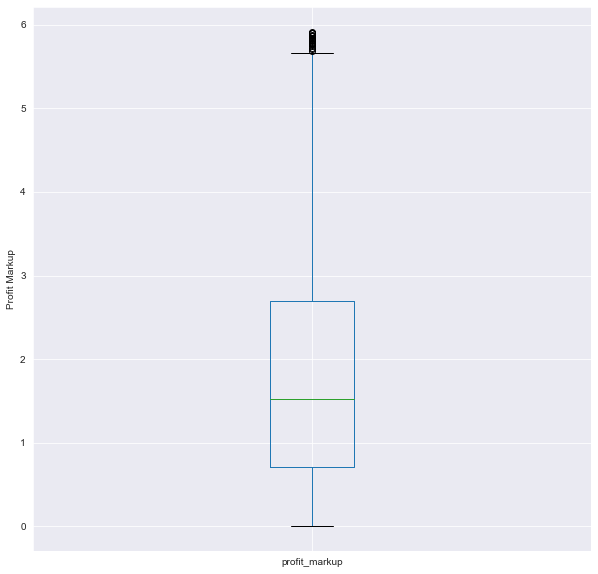

In [1193]:
# Calculating the first,second,third quartile and IQR
e = df_suc['profit_markup'].describe()[6]-df_suc['profit_markup'].describe()[4]
o = df_suc['profit_markup'].describe()[5]
#filtring for data within 1.5 IQR
df_suc = df_suc.query(f'{o - 1.5*e}<profit_markup<{o + 1.5*e}')
df_suc.boxplot(column = ['profit_markup'],figsize = (10,10))
plt.ylabel('Profit Markup');

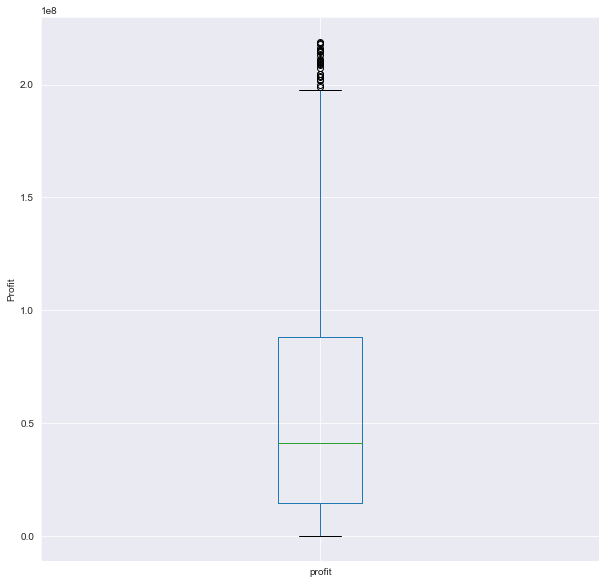

In [1194]:
# Calculating the first,second,third quartile and IQR
e = df_suc['profit'].describe()[6]-df_suc['profit'].describe()[4]
o = df_suc['profit'].describe()[5]
#filtring for data within 1.5 IQR
df_suc = df_suc.query(f'{o - 1.5*e}<profit<{o + 1.5*e}')
df_suc.boxplot(column = ['profit'],figsize = (10,10))
plt.ylabel('Profit');

In [1195]:
#new df for movies with budget less/higher than the median budget
print(df_suc.shape)
bud_median = df_suc['budget_adj'].median()
low_bud_suc = df_suc.query(f' budget_adj < {bud_median}')      
high_bud_suc = df_suc.query(f' budget_adj >= {bud_median}')

lowbud = pd.DataFrame(low_bud_suc.mean(),columns = ['Low Budget Movies'])    # the mean of each spilited dataframe (above median , below median)
highbud = pd.DataFrame(high_bud_suc.mean(), columns = ['High Budget Movies'])

(1329, 11)


## High Budget Movies

In [1196]:
lowbud

Low Budget Movies
vote_count                  3.791130e+02
vote_average                6.167620e+00
release_year                2.008539e+03
budget_adj                  1.690344e+07
revenue_adj                 4.910543e+07
profit                      3.220199e+07
profit_markup               1.939125e+00
profit_margin_percent       5.544544e+01

## Low Budget Movies

In [1197]:
highbud

High Budget Movies
vote_count                   7.544481e+02
vote_average                 6.104060e+00
release_year                 2.007435e+03
budget_adj                   7.192147e+07
revenue_adj                  1.566843e+08
profit                       8.476285e+07
profit_markup                1.345437e+00
profit_margin_percent        4.918659e+01

### Finding
From the previous analysis, it is found that movies with a higher budget than the median has more net profit compared to movies with less budget, but movies with a low budget on average have higher profit markup (dollars won for each dollar spent) and higher profit margin (the percentage of the net profit from the total profit).

## Visualization of Profit Markup for high/low budget films

Mean Profit Markup
Low Budget             1.939125
High Budget            1.345437

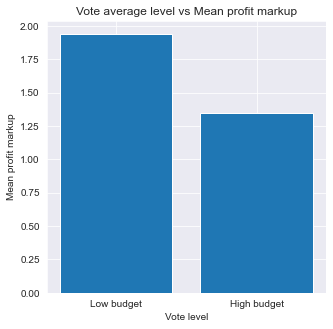

In [1198]:
plt.rcParams["figure.figsize"] = (5,5)

low = low_bud_suc.mean()[6]
high = high_bud_suc.mean()[6]
liist = [low , high]
plt.bar([1,2],liist)
plt.xticks([1,2],['Low budget','High budget'])
plt.title('Vote average level vs Mean profit markup')
plt.xlabel('Vote level')
plt.ylabel('Mean profit markup');
pd.DataFrame(liist, index = ['Low Budget','High Budget'], columns = ['Mean Profit Markup'])


## Visualization of Profit Margin Percentage for high/low budget films

Mean Profit Margin
Low Budget            55.445438
High Budget           49.186589

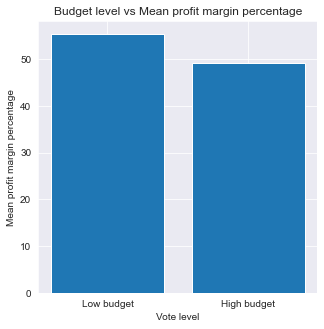

In [1199]:
plt.rcParams["figure.figsize"] = (5,5)

low = low_bud_suc.mean()[7]
high = high_bud_suc.mean()[7]
liist = [low , high]
plt.bar([1,2],liist)
plt.xticks([1,2],['Low budget','High budget'])
plt.title('Budget level vs Mean profit margin percentage')
plt.xlabel('Vote level')
plt.ylabel('Mean profit margin percentage');
pd.DataFrame(liist, index = ['Low Budget','High Budget'], columns = ['Mean Profit Margin'])


## Corelation between average votes and revenue

## vote level approach

profit_margin_percent
vote_level                       
low                     48.689814
medium                  51.625100
high                    58.153267

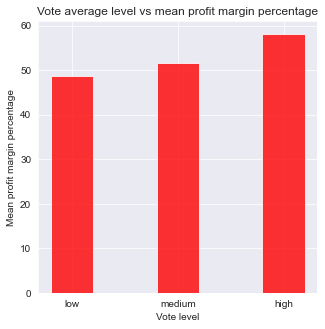

In [1200]:
# I will cut the data into 4 parts in terms of vote average: low,medium, and high based upon the min 
# 25% to 75% and max of the average vote data. I will group the data by these 3 vote levels and compare the mean
# profit markup and profit margin percentage
plt.rcParams["figure.figsize"] = (5,5)

vot = list(df_suc['vote_average'].describe())
bin_edge = [vot[3],vot[4],vot[6],vot[7]]
bin_name = ['low','medium','high']
df_suc['vote_level'] = pd.cut(df_suc['vote_average'],bin_edge,labels = bin_name)
#plotting
height = df_suc.groupby('vote_level')['profit_margin_percent'].mean()
width = 0.4
ind = (np.arange(len(height)))
plt.bar(ind,height,width,alpha = 0.8 , color = 'r')
locationss = ind  # xtick locations
labelss = np.array(height.index)# xtick labels
plt.xticks(locationss, labelss, rotation = 0)
plt.title('Vote average level vs mean profit margin percentage')
plt.xlabel('Vote level')
plt.ylabel('Mean profit margin percentage');
pd.DataFrame(df_suc.groupby('vote_level')['profit_margin_percent'].mean())

The Mean profit margin for movies in the high ratings bin is higher than the rest. The plot takes a linear shape line

profit_markup
vote_level               
low              1.399392
medium           1.599553
high             2.027224

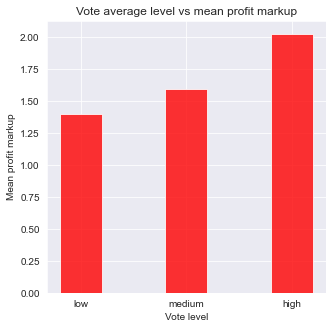

In [1201]:
plt.rcParams["figure.figsize"] = (5,5)

vot = list(df_suc['vote_average'].describe())
bin_edge = [vot[3],vot[4],vot[6],vot[7]]
bin_name = ['low','medium', 'high']
df_suc['vote_level'] = pd.cut(df_suc['vote_average'],bin_edge,labels = bin_name)
height = df_suc.groupby('vote_level')['profit_markup'].mean()
width = 0.4
ind = (np.arange(len(height)))
plt.bar(ind,height,width,alpha = 0.8 , color = 'r')
locationss = ind  # xtick locations
labelss = np.array(height.index)# xtick labels
plt.xticks(locationss, labelss, rotation = 0)
plt.title('Vote average level vs mean profit markup')
plt.xlabel('Vote level')
plt.ylabel('Mean profit markup');
pd.DataFrame(df_suc.groupby('vote_level')['profit_markup'].mean())

The Mean profit Markup for movies in the high ratings bin is higher than the rest. The plot takes a linear shape line

## A histogram of Vote level

vote_level
medium         625
low            390
high           312

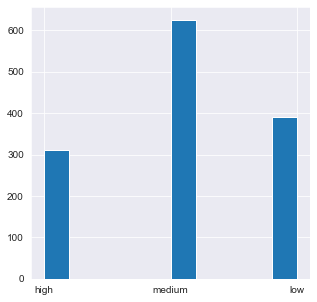

In [1202]:
df_suc['vote_level'].hist();
pd.DataFrame(df_suc['vote_level'].value_counts())



## scatter plot approach
I will plot a scatter plot for the Profit Markup/Margin percentage vs the average vote

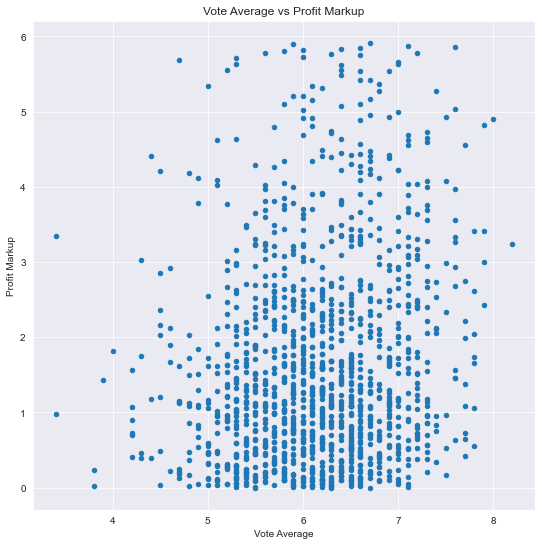

In [1203]:
df_suc[['vote_average','profit_markup']].plot(kind = 'scatter', x = 'vote_average' , y='profit_markup',title = 'Vote Average vs Profit Markup',xlabel = 'Vote Average',ylabel = 'Profit Markup',figsize = (9,9));

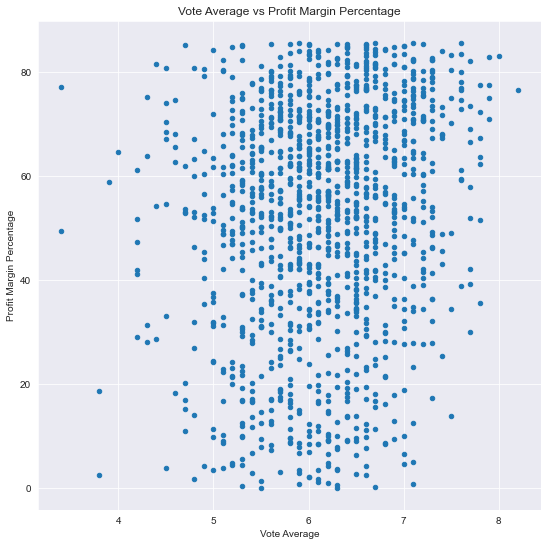

In [1204]:
df_suc.plot(kind = 'scatter', x = 'vote_average' , y='profit_margin_percent',title = 'Vote Average vs Profit Margin Percentage',xlabel = 'Vote Average',ylabel = 'Profit Margin Percentage',figsize = (9,9));

### Finding
In the vote level approach, we divided the whole dataset into 3 groups: High/medium/low vote level, high vote level is from (8.2, 6.6), medium is from (6.6, 5.7) and low is from (5.7, 3.4).  

It is found in our dataset that moves in the high vote average bin tend to have higher revenue but, it can also be noted that the difference in revenue is not that large, in the profit margin percentage graph, the difference between the low bin and the high bin is around 10%.

In the scatter plot approach, we can observe that the number of movies that have high ratings is lower compared to other movies and most of them tend to have a higher profit. But because the number of movies in the medium-low/high ratings is great, that could justify why their profit markup/margin means is lower, because they have more films that did not do great also, we can observe that movies with low vote ratings tend to have less profit.

Finally, we can conclude that the correlation between vote ratings and profit is not that strong. Movies with low ratings tend to have low profits opposite to high rating films, But in the medium range of voting, a great variety of films can be found that generated very high profits and also low profits.

<a id='conclusions'></a>
# Conclusions
We explored our data set and put our questions into two main parts popularity and revenue. 


First, we limited our analysis to movies starting from 2000.


While exploring the popularity of movies, we questioned which director has made the most popular films. 
At first, we found that the directors who directed the most popular films usually direct a very small number of movies. This could have multiple reasons such as a movie being a remake of an old blockbuster. So we made the same analysis but with the directors that directed the most amount of films and maintained good popularity and we got some really big names such as Quentin Tarantino, David Finsher and Christopher Nolan. 

When exploring the months where the most popular films are released, a pattern was discovered where the most popular films are released in the middle of the year (May, June, July) and at the end of the year (November and December).

When exploring the genres of most popular, science fiction stands out as it is found many times among the top genres.

While exploring Revenue, we introduced two new concepts profit markup and profit margin percentage. Profit markup is the number of dollars won for each dollar spent and profit margin is the percentage of the net profit from the total profit. While comparing between the low/high budget films, we first limited our dataset to movies that are 1.5 times the interquartile range from the median this limited our data from 1751 movies to 1329 movies (that made + net profit). 
While movies with a higher budget do make on average more profit, they have less profit markup and profit margin compared to lower budget films. 

We also found that movie revenue doesn't have much impact on average voting, although movies that made higher profit margins and profit markup tend to have higher ratings the difference is not that big with low or medium ratings.

### Short Comings and Limitations
Because this is a very large dataset we limited our analysis to films that were released starting from 2000 onwards. this limited the analysis from more than 10,000 movies to around 7000. The data puts 0 values in movies that had very low budgets and revenues, so we were obliged to remove these rows, this limited the analysis down to around 2500 movies. It is better to have another dataset about movies that were made with relatively very low budgets so that they could be analyzed.